In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("Students_Grading_Dataset.csv")
print(data.shape)
data.head()

(5000, 23)


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [3]:
data.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),516
Midterm_Score,0
Final_Score,0


# handling missing values

In [7]:
tota_missing_values = (data.isnull().sum().sum())/(data.shape[0]*data.shape[1])*100
print(f"total missing values =  {tota_missing_values} %")


total missing values =  2.4582608695652173 %


In [8]:
null_columns_pct = data.isnull().sum() / data.shape[0]*100
null_columns_pct

,0
Student_ID,0.00
First_Name,0.00
Last_Name,0.00
Email,0.00
Gender,0.00
Age,0.00
Department,0.00
Attendance (%),10.32
Midterm_Score,0.00
Final_Score,0.00


In [9]:
print(null_columns_pct[null_columns_pct > 0] ) #only null column

Attendance (%)            10.32
Assignments_Avg           10.34
Parent_Education_Level    35.88
dtype: float64


In [10]:
# fill nulls with median
data['Attendance (%)']=data['Attendance (%)'].fillna(data['Attendance (%)'].median())
data['Assignments_Avg']=data['Assignments_Avg'].fillna(data['Assignments_Avg'].median())

In [11]:
# fill nulls with mode
data['Parent_Education_Level']= data['Parent_Education_Level'].fillna(data['Parent_Education_Level'].mode()[0])

In [12]:
data.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0


# start visualization with matplotlib




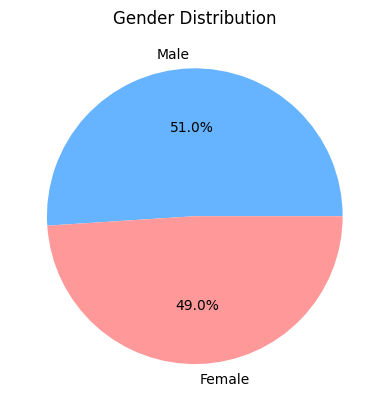

In [13]:
# males v.s females
plt.pie(data['Gender'].value_counts(), labels=data['Gender'].value_counts().index, autopct='%1.1f%%'
,colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.show()

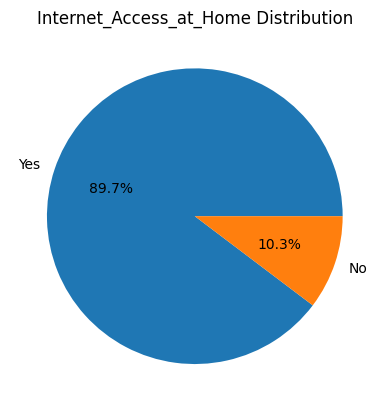

In [14]:
# males v.s females
plt.pie(data['Internet_Access_at_Home'].value_counts(), labels=data['Internet_Access_at_Home'].value_counts().index, autopct='%1.1f%%')
plt.title('Internet_Access_at_Home Distribution')
plt.show()

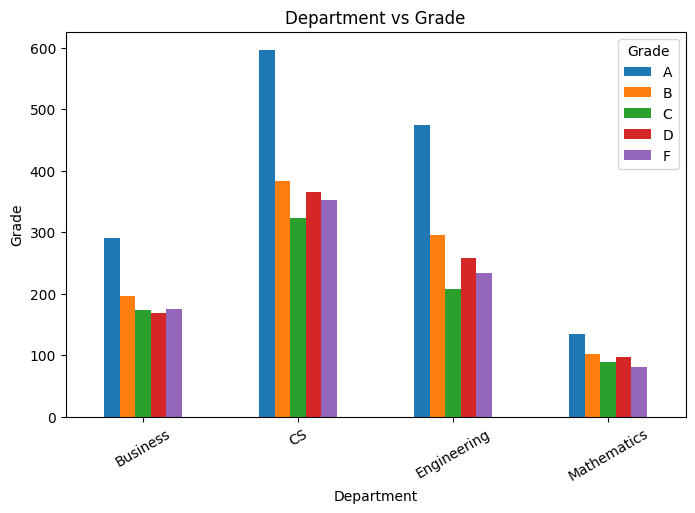

In [15]:
dep_count = pd.crosstab(data['Department'],data['Grade'])

dep_count.plot(kind='bar',figsize=(8,5),stacked=False)

plt.title('Department vs Grade')
plt.xlabel('Department')
plt.ylabel('Grade')
plt.xticks(rotation=30)
plt.show()

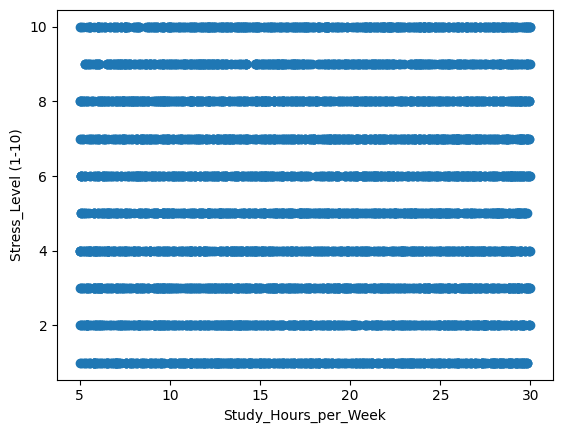

In [16]:
# make a count chart on gender
plt.scatter('Study_Hours_per_Week','Stress_Level (1-10)', data=data )
plt.xlabel('Study_Hours_per_Week')
plt.ylabel('Stress_Level (1-10)')
plt.show()

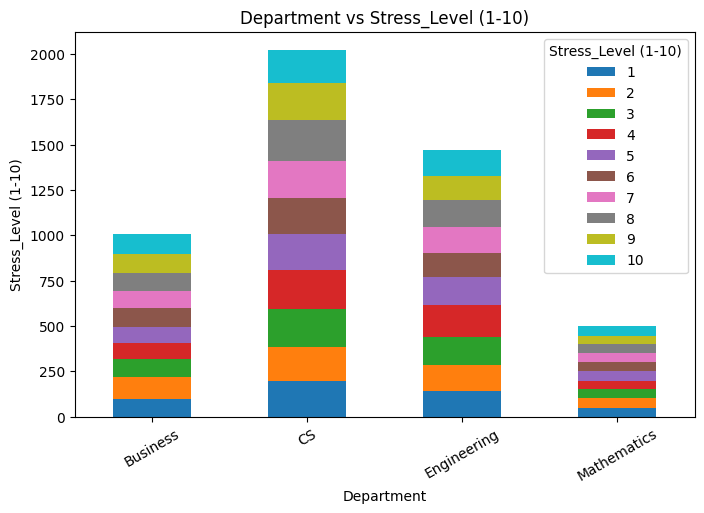

In [17]:
coun_stress_per_dept = pd.crosstab(data['Department'],data['Stress_Level (1-10)'])

coun_stress_per_dept.plot(kind='bar',figsize=(8,5),stacked=True)

plt.xticks(rotation =30)
plt.title('Department vs Stress_Level (1-10)')
plt.xlabel('Department')
plt.ylabel('Stress_Level (1-10)')
plt.show()


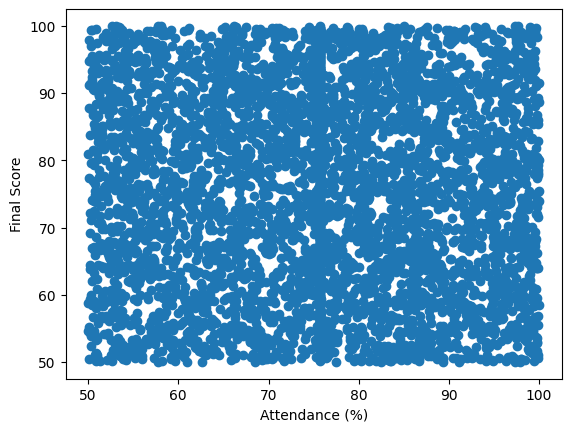

In [18]:
# is attendance effect on final score
plt.scatter(data['Attendance (%)'], data['Total_Score'])
plt.xlabel('Attendance (%)')
plt.ylabel('Final Score')
plt.show()

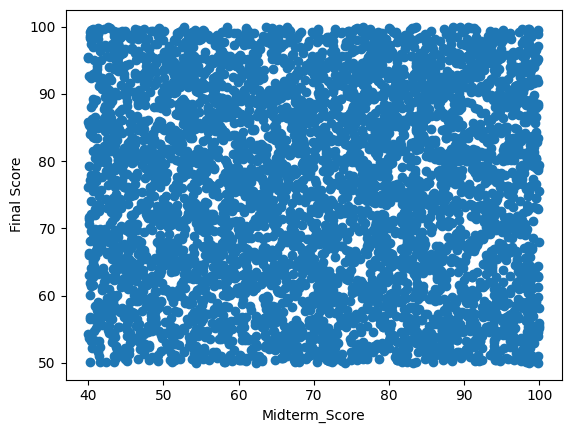

In [19]:
# is midterm effect on final score
plt.scatter(data['Midterm_Score'], data['Total_Score'])
plt.xlabel('Midterm_Score')
plt.ylabel('Final Score')
plt.show()

# using seaborn start from here

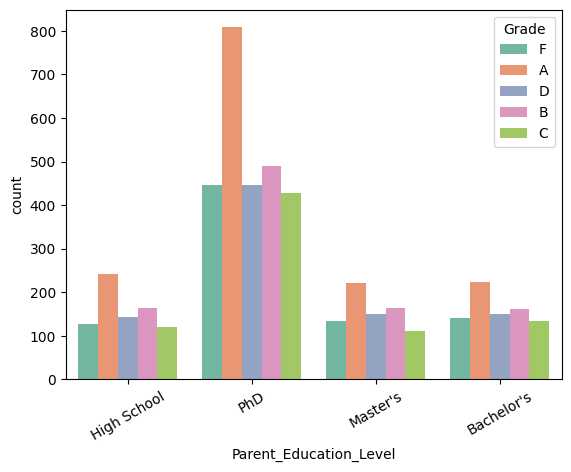

In [20]:
# Parent_Education_Level v.s grades
sns.countplot(x= 'Parent_Education_Level', hue='Grade', data=data, palette='Set2')
plt.xticks(rotation=30)
plt.show()

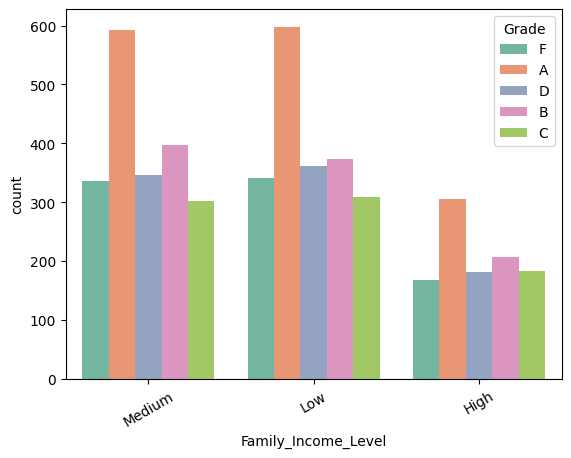

In [21]:
# Family_Income_Level v.s grades
sns.countplot(x= 'Family_Income_Level', hue='Grade', data=data, palette='Set2')
plt.xticks(rotation=30)
plt.show()

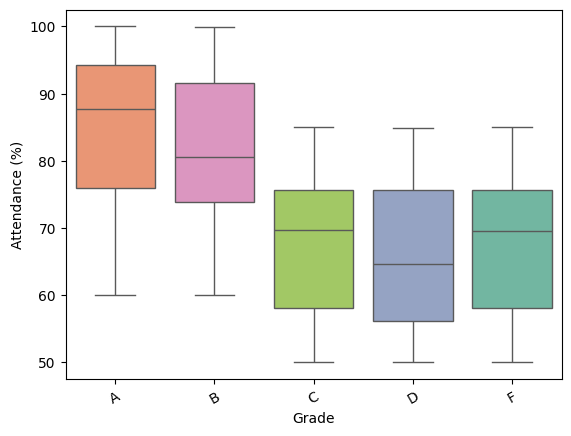

In [22]:
order_grade = ['A','B','C','D','F']
sns.boxplot(x='Grade', y='Attendance (%)',data=data,hue='Grade',palette='Set2',
            order=order_grade)
plt.xticks(rotation=30)
plt.show()

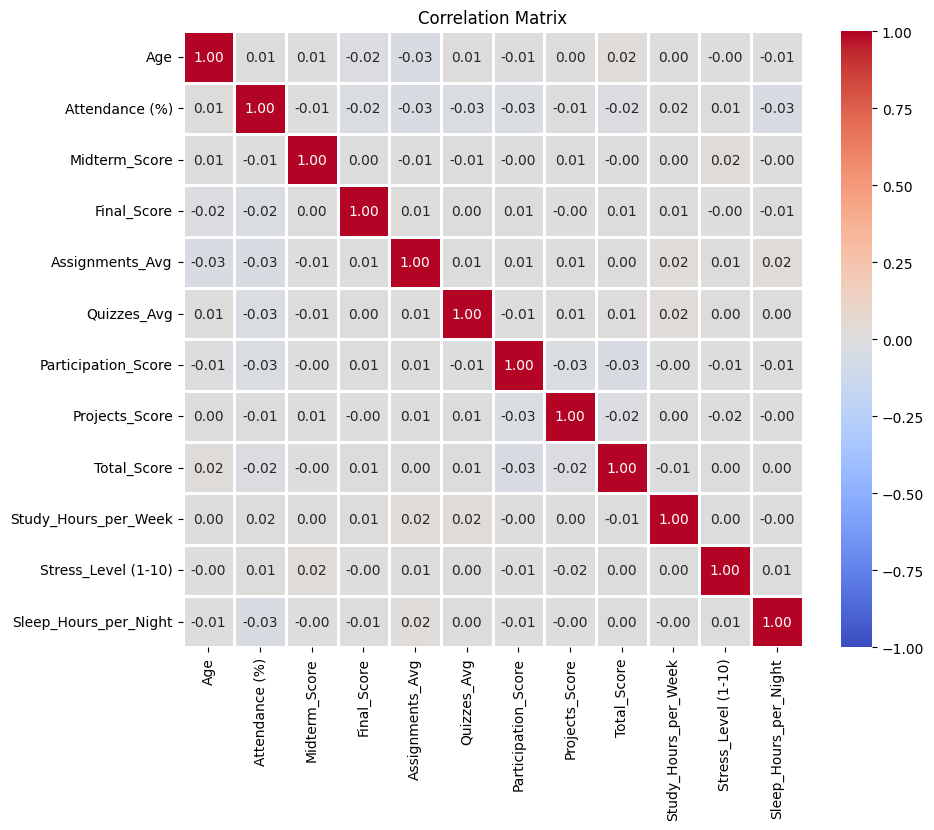

In [23]:
numrec_data = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(numrec_data, annot=True, cmap='coolwarm', linewidths= 1,
            fmt='.2f',vmax=1,vmin=-1)
plt.title('Correlation Matrix'  )
plt.show()

# using plotly

In [29]:
import plotly.express as px

fig = px.histogram(
    data,
    x="Parent_Education_Level",
    color="Grade",
    barmode="group",
    title="Parent Education Level vs. Grades"
)
fig.update_layout(xaxis_tickangle=-30)
fig.show()


In [35]:
df2 = data.groupby(['Parent_Education_Level','Grade']).size().reset_index(name= "count")
df2

,Parent_Education_Level,Grade,count
0,Bachelor's,A,223
1,Bachelor's,B,161
2,Bachelor's,C,135
3,Bachelor's,D,151
4,Bachelor's,F,140
5,High School,A,242
6,High School,B,164
7,High School,C,121
8,High School,D,143
9,High School,F,126


In [42]:
custom_order = ["PhD","High School", "Bachelor's", "Master's" ]

fig = px.bar(
    df2,
    x="Parent_Education_Level",
    y="count",
    color="Grade",
    barmode="group",
    title="Parent Education Level vs. Grades",
    category_orders={"Parent_Education_Level": custom_order}
)
fig.update_layout(xaxis_tickangle=-30)
fig.show()

In [49]:
px.pie(data,names='Gender',title='Grade Distribution')

In [53]:
px.pie(data,names='Age',title='Age Distribution')

In [56]:
# scatter with plotly between total score and study hours per week
fig = px.scatter(data, x='Study_Hours_per_Week', y='Total_Score',color='Grade' ,title='Total Score vs. Study Hours')
fig.show()
